# ИУ5-61Б Плотников Ф.С.
## Вариант 19
### Номер задачи: 3
### Номер набора данных, указанного в задаче: 3

# Задание

### Для студентов групп ИУ5-61Б дополнительное задание - для пары произвольных колонок данных построить график "Диаграмма рассеяния".

## Задача №3
### Для заданного набора данных произведите масштабирование данных (для одного признака) и преобразование категориальных признаков в количественные двумя способами (label encoding, one hot encoding) для одного признака. Какие методы Вы использовали для решения задачи и почему?

### Набор данных: https://www.kaggle.com/fivethirtyeight/fivethirtyeight-comic-characters-dataset (файл marvel-wikia-data.csv)

In [1]:
# Импорт библиотек
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import MissingIndicator, SimpleImputer

In [2]:
#Загрузка датасета
data = pd.read_csv("marvel-wikia-data.csv")
data.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST_APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


In [3]:
data.shape

(16376, 13)

In [4]:
data.isnull().sum()

page_id                 0
name                    0
urlslug                 0
ID                   3770
ALIGN                2812
EYE                  9767
HAIR                 4264
SEX                   854
GSM                 16286
ALIVE                   3
APPEARANCES          1096
FIRST_APPEARANCE      815
Year                  815
dtype: int64

## Обработка пропусков
### В столбце ID я решил заполнить пропуски значением Secret Identity 
### Столбкц ALIGN я решил заполнить значениями most_frequency
### Столбец EYE HAIR значениями most_frequency
### Столбец SEX заполнить значениями Asexual Characters (бесполый персонаж)
### Столбец GSM содержит слишком много пропусков, поэтому его я решил удалить
### В столбце ALIVE мало пропусков, поэтому в нем я просто удалил 3 строки с пропусками
### Последние три столбца я решил заполнить значениями median

In [5]:
data.ID.fillna('Secret Identity', inplace=True)

In [6]:
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [7]:
strategies=['mean', 'median', 'most_frequent']
data.ALIGN.fillna(test_num_impute_col(data, 'ALIGN', strategies[2])[3], inplace=True)
data.EYE.fillna(test_num_impute_col(data, 'EYE', strategies[2])[3], inplace=True)
data.HAIR.fillna(test_num_impute_col(data, 'HAIR', strategies[2])[3], inplace=True)

In [8]:
data.SEX.fillna('Asexual Characters', inplace=True)

In [9]:
data.drop(columns=['GSM'], inplace=True) 

In [10]:
data.shape

(16376, 12)

In [11]:
data.APPEARANCES.fillna(test_num_impute_col(data, 'APPEARANCES', strategies[1])[3], inplace=True)
data.FIRST_APPEARANCE.fillna(test_num_impute_col(data, 'FIRST_APPEARANCE', strategies[2])[3], inplace=True)
data.Year.fillna(test_num_impute_col(data, 'Year', strategies[1])[3], inplace=True)

In [12]:
data.isnull().sum()

page_id             0
name                0
urlslug             0
ID                  0
ALIGN               0
EYE                 0
HAIR                0
SEX                 0
ALIVE               3
APPEARANCES         0
FIRST_APPEARANCE    0
Year                0
dtype: int64

In [13]:
data = data.dropna(axis=0)
data.shape

(16373, 12)

In [14]:
data.isnull().sum()

page_id             0
name                0
urlslug             0
ID                  0
ALIGN               0
EYE                 0
HAIR                0
SEX                 0
ALIVE               0
APPEARANCES         0
FIRST_APPEARANCE    0
Year                0
dtype: int64

## Преобразование категориальных признаков методом Label Encoder

In [15]:
cat_enc = pd.DataFrame({'ID':data.ID})
cat_enc

,ID
0,Secret Identity
1,Public Identity
2,Public Identity
3,Public Identity
4,No Dual Identity
...,...
16371,No Dual Identity
16372,No Dual Identity
16373,Secret Identity
16374,Secret Identity


In [16]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['ID'])
data.ID = cat_enc_le

In [17]:
data.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,FIRST_APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),3,Good Characters,Hazel Eyes,Brown Hair,Male Characters,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),2,Good Characters,Blue Eyes,White Hair,Male Characters,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),2,Neutral Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),2,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),1,Good Characters,Blue Eyes,Blond Hair,Male Characters,Living Characters,2258.0,Nov-50,1950.0


## Диаграмма рассеяния

<AxesSubplot:title={'center':'Диаграмма рассеяния для колонок APPEARANCES и SEX'}, xlabel='APPEARANCES', ylabel='SEX'>

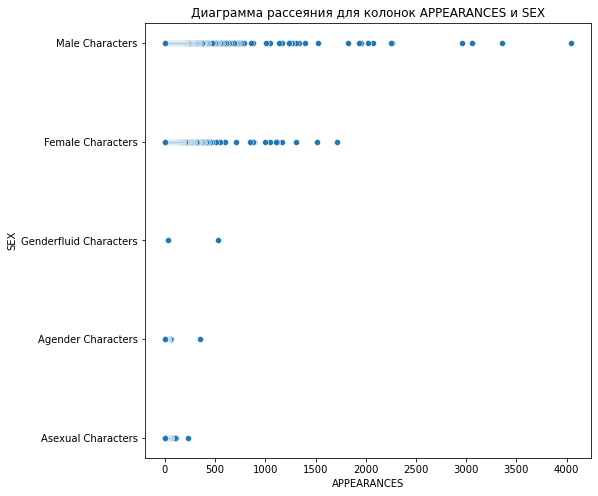

In [18]:
fig, ax = plt.subplots(figsize=(8,8)) 
ax.set_title("Диаграмма рассеяния для колонок APPEARANCES и SEX")
sns.scatterplot(ax=ax, x='APPEARANCES', y='SEX', data=data)

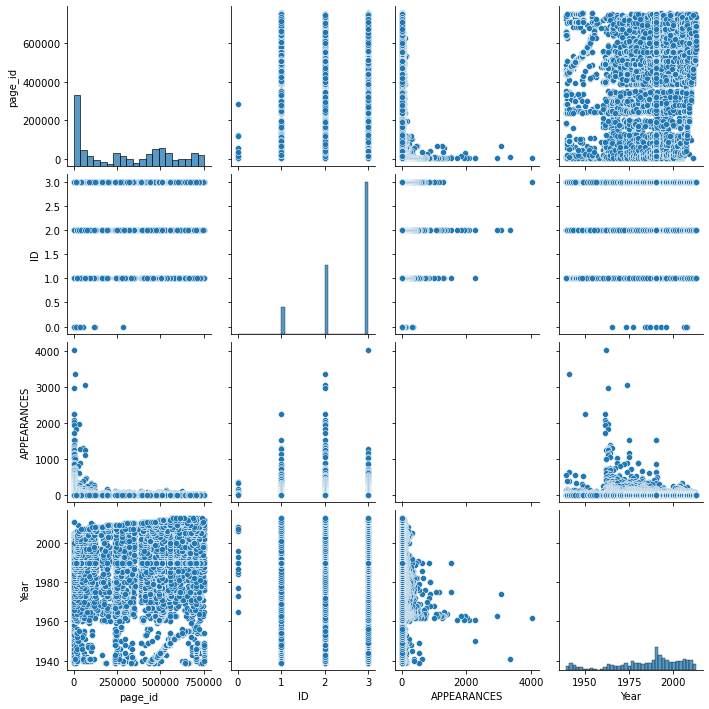

In [19]:
sns.pairplot(data)

## Масштабирование данных

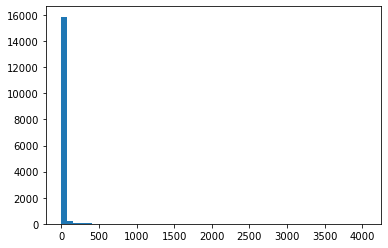

In [20]:
plt.hist(data.APPEARANCES, 50)
plt.show()

In [21]:
sc = StandardScaler()
sc_data = sc.fit_transform(data[['APPEARANCES']])

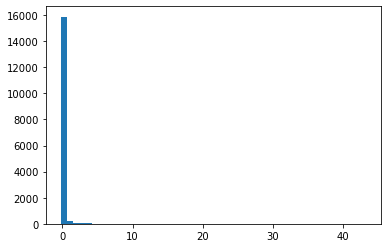

In [22]:
plt.hist(sc_data, 50)
plt.show()